# Animal Classifier

In [1]:
from zipfile import ZipFile 
import os
import shutil
import random

DATADIR = './Animal Image Dataset/train'

if os.path.exists(DATADIR):
    print(" 'Animal Image Dataset' has already exists.")
else:
    
    with ZipFile("./Animal Image Dataset.zip", 'r') as zObject: 
    
        # Extracting all the members of the zip  
        zObject.extractall( 
            path=".") 
Categories = sorted([name for name in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, name))])


 'Animal Image Dataset' has already exists.


In [2]:

train_data = os.path.join('Animal Image Dataset/train')

val_data = os.path.join('Animal Image Dataset/validation')

print((train_data))
base_dir = './Animal Image Dataset/train'
categories = [name for _, dirs, _ in os.walk(base_dir) for name in dirs]
print(categories)

categories_len = len(categories)
print(categories_len)

Animal Image Dataset/train
['butterfly', 'cat', 'cow', 'dog', 'elephant', 'hen', 'horse', 'monkey', 'panda', 'sheep', 'spider', 'squirrel']
12


In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to training and validation datasets
BASE_DIR = 'Animal Image Dataset'
TRAINING_DIR = os.path.join(BASE_DIR, 'train')
VALIDATION_DIR = os.path.join(BASE_DIR, 'validation')

# Augmentation for training images
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,   # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,   # Shear transformation
    zoom_range=0.2,    # Zooming
    horizontal_flip=True,  # Horizontal flip
    validation_split=0.2  # Validation split
)

# Only normalization for validation images
validation_datagen = ImageDataGenerator(rescale=1./255)

# Parameters
IMG_SIZE = (150, 150)  # Optimized image size
BATCH_SIZE = 32  # Optimal batch size for speed

# Loading training data
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Loading validation data
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 13735 images belonging to 12 classes.
Found 3443 images belonging to 12 classes.


# Model

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers, models

# Create CNN model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten before feeding into Dense layers
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Helps prevent overfitting

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Additional dropout layer

    layers.Dense(categories_len, activation='softmax')  # Output layer
])


# Model Summmary
model.summary()


c:\Users\user\Desktop\тестове лютий зимове стажування\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,100,876 (72.86 MB)

 Trainable params: 19,100,876 (72.86 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)



In [6]:

# Model fit
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=40,  
    callbacks=[early_stopping, reduce_lr]
)


c:\Users\user\Desktop\тестове лютий зимове стажування\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
430/430 ━━━━━━━━━━━━━━━━━━━━ 404s 929ms/step - accuracy: 0.1150 - loss: 2.4736 - val_accuracy: 0.2263 - val_loss: 2.2568 - learning_rate: 1.0000e-04
Epoch 2/40
430/430 ━━━━━━━━━━━━━━━━━━━━ 431s 1s/step - accuracy: 0.2272 - loss: 2.2601 - val_accuracy: 0.3148 - val_loss: 2.0277 - learning_rate: 1.0000e-04
Epoch 3/40
430/430 ━━━━━━━━━━━━━━━━━━━━ 333s 775ms/step - accuracy: 0.2701 - loss: 2.1227 - val_accuracy: 0.3668 - val_loss: 1.9132 - learning_rate: 1.0000e-04
Epoch 4/40
430/430 ━━━━━━━━━━━━━━━━━━━━ 311s 722ms/step - accuracy: 0.3059 - loss: 2.0258 - val_accuracy: 0.3976 - val_loss: 1.8334 - learning_rate: 1.0000e-04
Epoch 5/40
430/430 ━━━━━━━━━━━━━━━━━━━━ 255s 593ms/step - accuracy: 0.3344 - loss: 1.9498 - val_accuracy: 0.4153 - val_loss: 1.7521 - learning_rate: 1.0000e-04
Epoch 6/40
430/430 ━━━━━━━━━━━━━━━━━━━━ 256s 595ms/step - accuracy: 0.3669 - loss: 1.8727 - val_accuracy: 0.4252 - val_loss: 1.6914 - learning_rate: 1.0000e-04
Epoch 7/40
430/430 ━━━━━━━━━━━━━━━━━━━━ 254

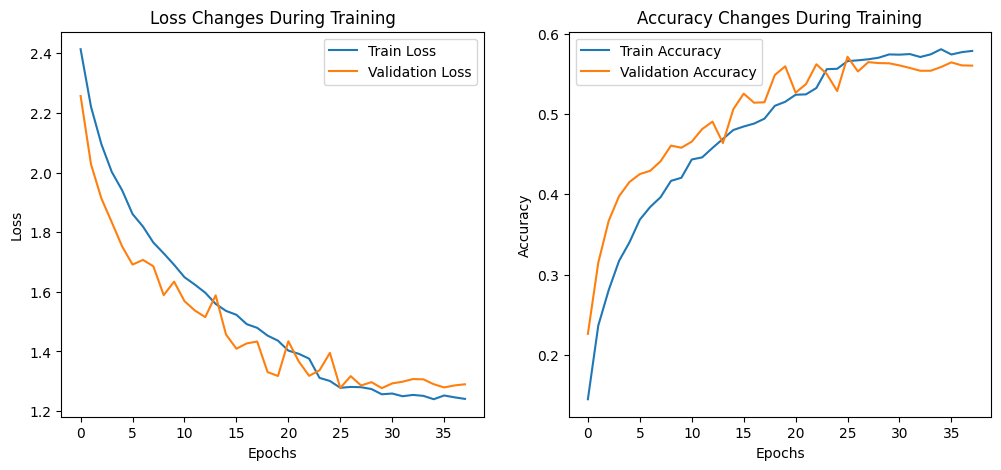

In [7]:
import matplotlib.pyplot as plt

# Visualizing the training process
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Changes During Training')

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Changes During Training')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
Animal Image Dataset\validation\hen\572.jpeg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

# Save model

In [8]:
# Save the weights
model.save('./animal_classifier_img_1.keras')  # The file needs to end with the .keras extension
